In [1]:
from dataset import DataClean
from training_class import ModelTrainer, SimpleCNN, setUp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms

In [2]:
dataClean = DataClean()
X_train, y_train = dataClean.get_train_data()
X_test, y_test = dataClean.get_test_data()

print(X_train.head())
print(y_train.head())


   pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3     0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

   pixel9  pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
1     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
2     0.0      0.0  ...  0.000000       0.0       0.0  0.117647  0.168627   
3     0.0      0.0  ...  0.011765       0.0       0.0  0.000000  0.000000   
4     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0  0.000000       0.0       0.0 

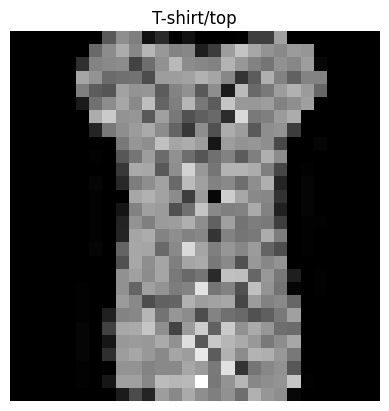

In [3]:
dataClean.print_random_image()

In [4]:
fashion_mnist = DataClean()
X_train, y_train = fashion_mnist.get_train_data()
X_test, y_test = fashion_mnist.get_test_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = setUp(X_train, y_train, transform=transform)
val_dataset = setUp(X_val, y_val, transform=transform)
test_dataset = setUp(X_test, y_test, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

device = "cpu"
model = SimpleCNN(num_classes=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trainer = ModelTrainer(model, loss_fn, optimizer, device)

In [5]:
epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    trainer.train(train_dataloader)
    trainer.test(val_dataloader)

trainer.test(test_dataloader)

Epoch 1
-------------------------------
loss: 2.292540  [    0/48000]
loss: 0.469146  [ 6400/48000]
loss: 0.451702  [12800/48000]
loss: 0.451083  [19200/48000]
loss: 0.480745  [25600/48000]
loss: 0.223131  [32000/48000]
loss: 0.327304  [38400/48000]
loss: 0.279206  [44800/48000]
Test Error: 
 Accuracy: 88.5%, Avg loss: 0.313985 

Test Error: 
 Accuracy: 89.4%, Avg loss: 0.294291 



{'accuracy': 89.4, 'avg_loss': 0.29429147283362733}

Lowest F2 Score Class: 6, F2 Score: 0.6508264462809917


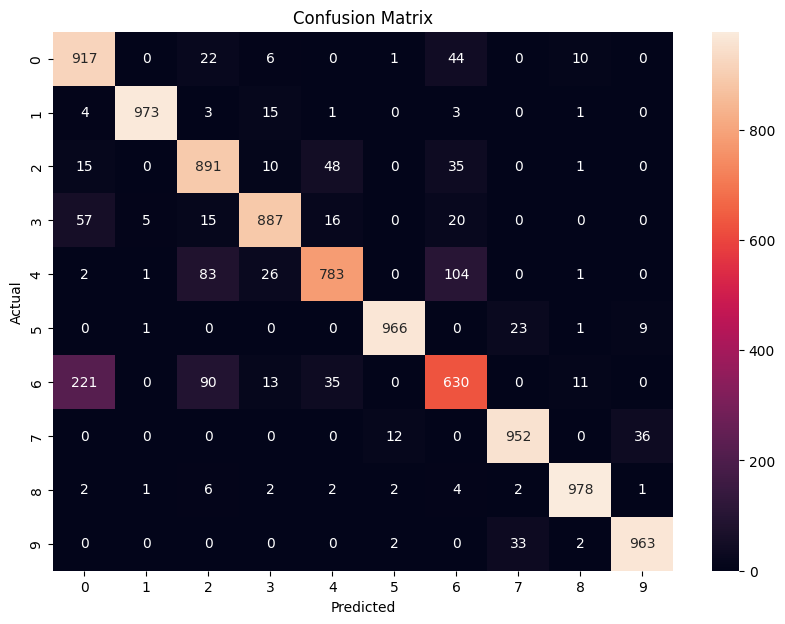

In [6]:
trainer.analyze_results(test_dataloader)